<a href="https://colab.research.google.com/github/ShantanuSinghBankoti/Loan-Predictor/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
train_data= pd.read_csv('train_ctrUa4K.csv')
test_data= pd.read_csv('test_lAUu6dG.csv')
test_data_=pd.read_csv('test_lAUu6dG.csv')

## Looking at data


In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test_data_.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

##Data Cleaning

In [ ]:
train_data['Gender'].mode()

0    Male
dtype: object

In [ ]:
test_data['Gender'].mode()

0    Male
dtype: object

In [ ]:
train_data["Gender"].fillna('Male', inplace = True) 
test_data["Gender"].fillna('Male',inplace= True)

In [ ]:
test_data['Self_Employed'].mode()


0    No
dtype: object

In [ ]:
test_data["Self_Employed"].fillna('No', inplace = True)

In [ ]:
test_data['Credit_History'].mode()

0    1.0
dtype: float64

In [ ]:
test_data["Credit_History"].fillna(1, inplace = True)

In [ ]:
train_data['Self_Employed'].mode()

0    No
dtype: object

In [ ]:
train_data['Credit_History'].mode()

0    1.0
dtype: float64

In [ ]:
train_data["Credit_History"].fillna(1, inplace = True)
train_data["Self_Employed"].fillna('No', inplace = True)

In [ ]:
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,614.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.855049
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data['Married'].mode()

0    Yes
dtype: object

In [ ]:
train_data["Married"].fillna('Yes', inplace = True)

In [ ]:
train_data["Dependents"].fillna(1, inplace = True)
train_data["LoanAmount"].fillna(146, inplace = True)
train_data["Loan_Amount_Term"].fillna(342, inplace = True)

In [ ]:
test_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.000000,367.000000,367.000000,362.000000,361.000000,367.000000
mean,0.829132,4805.599455,1569.577657,136.132597,342.537396,0.839237
std,1.071302,4910.685399,2334.232099,61.366652,65.156643,0.367814
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test_data["Dependents"].fillna(1, inplace = True)
test_data["LoanAmount"].fillna(136, inplace = True)
test_data["Loan_Amount_Term"].fillna(343, inplace = True)

In [ ]:
train_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train_data=pd.get_dummies(data=train_data, columns=['Gender', 'Married','Education','Self_Employed','Property_Area'])
train_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0.0,5849,0.0,146.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,LP001003,1.0,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,LP001005,0.0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,LP001008,0.0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1


In [ ]:
test_data=pd.get_dummies(data=test_data, columns=['Gender', 'Married','Education','Self_Employed','Property_Area'])
test_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0.0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
1,LP001022,1.0,3076,1500,126.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
2,LP001031,2.0,5000,1800,208.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
3,LP001035,2.0,2340,2546,100.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
4,LP001051,0.0,3276,0,78.0,360.0,1.0,0,1,1,0,0,1,1,0,0,0,1


In [ ]:
train_data=train_data.drop(columns=['Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Loan_ID'])
test_data=test_data.drop(columns=['Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Loan_ID'])

In [ ]:
train_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Urban
0,0.0,5849,0.0,146.0,360.0,1.0,Y,0,1,1,1,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,N,0,0,1,1,1,0
2,0.0,3000,0.0,66.0,360.0,1.0,Y,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Y,0,0,0,1,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,Y,1,1,1,1,1,0
610,3.0,4106,0.0,40.0,180.0,1.0,Y,0,0,1,1,1,0
611,1.0,8072,240.0,253.0,360.0,1.0,Y,0,0,1,1,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,Y,0,0,1,1,0,1


In [ ]:
train_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Urban
0,0.0,5849,0.0,146.0,360.0,1.0,Y,0,1,1,1,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,N,0,0,1,1,1,0
2,0.0,3000,0.0,66.0,360.0,1.0,Y,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,Y,0,0,0,1,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,Y,1,1,1,1,1,0
610,3.0,4106,0.0,40.0,180.0,1.0,Y,0,0,1,1,1,0
611,1.0,8072,240.0,253.0,360.0,1.0,Y,0,0,1,1,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,Y,0,0,1,1,0,1


##Outliers Treatment


{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb687e9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb688c438>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb688ceb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb688cb38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb687ecf8>,
  <matplotlib.lines.Line2D at 0x7f8cb688c0b8>]}

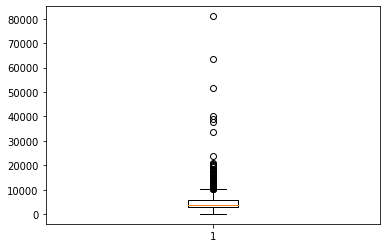

In [ ]:
plt.boxplot(train_data['ApplicantIncome'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb685ffd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb67eda20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb67f74e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb67f7160>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb67ed320>,
  <matplotlib.lines.Line2D at 0x7f8cb67ed6a0>]}

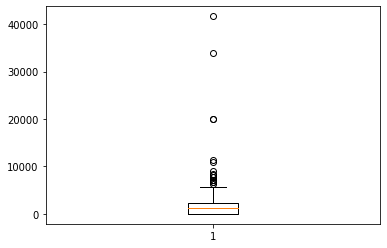

In [ ]:
plt.boxplot(train_data['CoapplicantIncome'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb67c5240>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb67c5c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb67cd710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb67cd390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb67c5550>,
  <matplotlib.lines.Line2D at 0x7f8cb67c58d0>]}

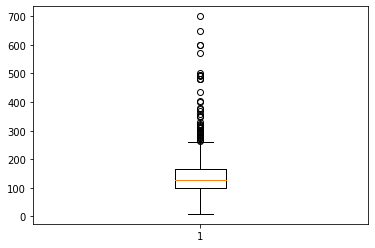

In [ ]:
plt.boxplot(train_data['LoanAmount'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb6729358>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb6729d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb6736828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb67364a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb6729668>,
  <matplotlib.lines.Line2D at 0x7f8cb67299e8>]}

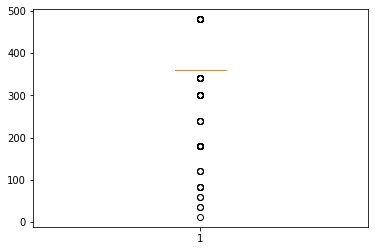

In [ ]:
plt.boxplot(train_data['Loan_Amount_Term'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb781abe0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb774ebe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb7758278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb775c940>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb782edd8>,
  <matplotlib.lines.Line2D at 0x7f8cb774e6a0>]}

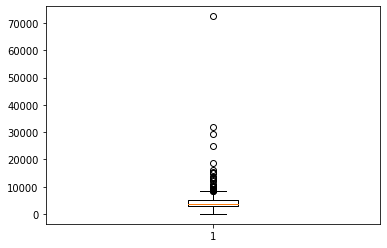

In [ ]:
plt.boxplot(test_data['ApplicantIncome'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb78bf0f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb701fac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb70fc278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb6eb49b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb708ca90>,
  <matplotlib.lines.Line2D at 0x7f8cb7017b00>]}

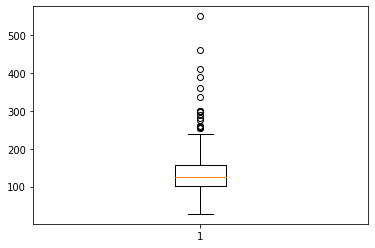

In [ ]:
plt.boxplot(test_data['LoanAmount'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cb68a3ac8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb677bac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb66437f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb6643470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb68977b8>,
  <matplotlib.lines.Line2D at 0x7f8cb6736d68>]}

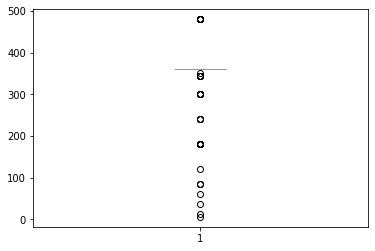

In [ ]:
plt.boxplot(test_data['Loan_Amount_Term'])

In [ ]:
q1=train_data['ApplicantIncome'].quantile(.05)
q3=train_data['ApplicantIncome'].quantile(.95)
iqr=q3-q1
train_data['ApplicantIncome']=np.where(train_data['ApplicantIncome']>(q3+iqr*1.5),(q3+iqr*1.5),train_data['ApplicantIncome'])

q1=train_data['CoapplicantIncome'].quantile(.05)
q3=train_data['CoapplicantIncome'].quantile(.95)
iqr=q3-q1
train_data['CoapplicantIncome']=np.where(train_data['CoapplicantIncome']>(q3+iqr*1.5),(q3+iqr*1.5),train_data['CoapplicantIncome'])

q1=train_data['LoanAmount'].quantile(.05)
q3=train_data['LoanAmount'].quantile(.95)
iqr=q3-q1
train_data['LoanAmount']=np.where(train_data['LoanAmount']>(q3+iqr*1.5),(q3+iqr*1.5),train_data['LoanAmount'])

In [ ]:
q1=test_data['ApplicantIncome'].quantile(.05)
q3=test_data['ApplicantIncome'].quantile(.95)
iqr=q3-q1
test_data['ApplicantIncome']=np.where(test_data['ApplicantIncome']>(q3+iqr*1.5),(q3+iqr*1.5),test_data['ApplicantIncome'])

q1=test_data['CoapplicantIncome'].quantile(.05)
q3=test_data['CoapplicantIncome'].quantile(.95)
iqr=q3-q1
test_data['CoapplicantIncome']=np.where(test_data['CoapplicantIncome']>(q3+iqr*1.5),(q3+iqr*1.5),test_data['CoapplicantIncome'])

q1=test_data['LoanAmount'].quantile(.05)
q3=test_data['LoanAmount'].quantile(.95)
iqr=q3-q1
test_data['LoanAmount']=np.where(test_data['LoanAmount']>(q3+iqr*1.5),(q3+iqr*1.5),test_data['LoanAmount'])

In [ ]:
train_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Education_Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Urban
0,0.0,5849.0,0.0,146.0,360.0,1.0,Y,0,1,1,1,0,1
1,1.0,4583.0,1508.0,128.0,360.0,1.0,N,0,0,1,1,1,0
2,0.0,3000.0,0.0,66.0,360.0,1.0,Y,0,0,1,0,0,1
3,0.0,2583.0,2358.0,120.0,360.0,1.0,Y,0,0,0,1,0,1
4,0.0,6000.0,0.0,141.0,360.0,1.0,Y,0,1,1,1,0,1


In [ ]:
from scipy import stats
corr= stats.pearsonr(train_data['LoanAmount'],train_data['Loan_Amount_Term'])
corr

(0.03963969246611913, 0.32678176011065274)

In [ ]:
y_train=train_data['Loan_Status']
train_data=train_data.drop(['Loan_Status'], axis = 1)

##Univariate Analysis

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2)
fit=best_features.fit(train_data,y_train)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train_data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
featureScores

,Specs,Score
0,Dependents,0.025113
1,ApplicantIncome,30.230854
2,CoapplicantIncome,688.194057
3,LoanAmount,40.646622
4,Loan_Amount_Term,3.267315
5,Credit_History,26.005877
6,Gender_Female,0.162407
7,Married_No,3.355645
8,Education_Graduate,0.988390
9,Self_Employed_No,0.001123


In [ ]:
x_train=train_data.drop(columns=['Self_Employed_No'])
x_test=test_data.drop(columns=['Self_Employed_No'])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training the XG_Boosting model on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

output = pd.DataFrame({'Loan_ID': test_data_.Loan_ID, 'Loan_Status': predictions})
output.to_csv('my_submission.csv', index=False)

##Applying K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.66 %
Standard Deviation: 3.98 %
